#### Fase 1: Exploración y Limpieza

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight_activity = "Customer Flight Activity.csv"
loyalty_history = "Customer Loyalty History.csv"

df_flights = pd.read_csv(flight_activity)
df_clients = pd.read_csv(loyalty_history)

In [3]:
print(df_clients.info())
print(df_flights.info())
print(df_clients.head())
print(df_flights.head())
print(df_clients.isnull().sum())
print(df_flights.isnull().sum())
print(df_clients.describe())
print(df_flights.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [4]:
df_flights = df_flights.drop_duplicates()
df_clients = df_clients.drop_duplicates()

In [ ]:
# Rellenamos valores nulos en Salary con la mediana
df_clients['Salary'] = df_clients['Salary'].fillna(df_clients['Salary'].median())
# Rellenamos valores nulos en Cancellation Year y Cancellation Month con 0
df_clients['Cancellation Year'] = df_clients['Cancellation Year'].fillna(0)
df_clients['Cancellation Month'] = df_clients['Cancellation Month'].fillna(0)

In [17]:
min_positive_salary = df_clients[df_clients['Salary'] >= 0]['Salary'].min()
df_clients['Salary'] = df_clients['Salary'].apply(lambda x: min_positive_salary if x < 0 else x)

In [6]:
# Combinamos los DataFrames usando la columna Loyalty Number para combinar los dos DataFrames y crear un DataFrame completo.
df_combined = pd.merge(df_flights, df_clients, on='Loyalty Number', how='inner')
print(df_combined.head())

   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  ... Education   Salary Marital Status  \
0                            0  ...  Bachelor  92552.0        Married   


In [7]:
print(df_combined.info())
print(df_combined.head())
print(df_combined.isnull().sum())
print(df_combined.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [8]:
df_combined['Year'] = df_combined['Year'].astype(int)
df_combined['Month'] = df_combined['Month'].astype(int)
df_combined['Salary'] = df_combined['Salary'].astype(float)

#### Fase 2: Visualización

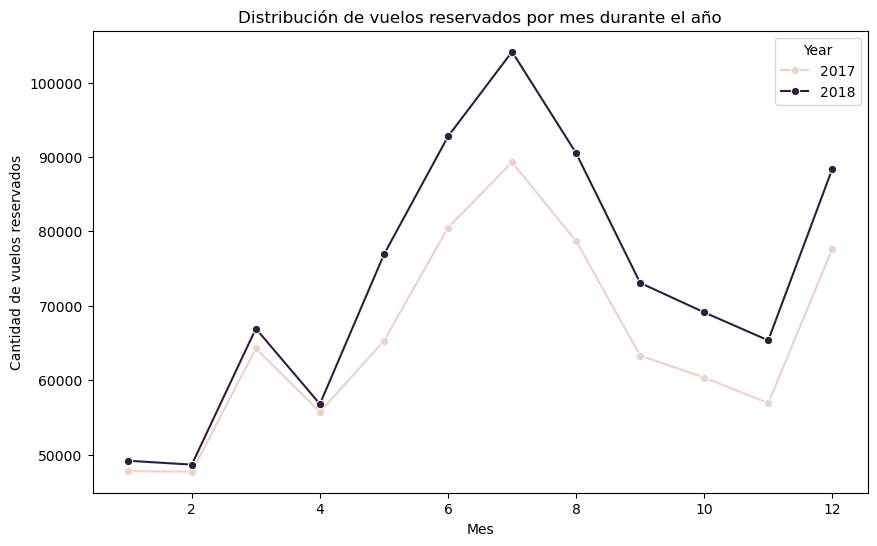

In [9]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
monthly_flights = df_combined.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_flights, x='Month', y='Flights Booked', hue='Year', marker='o')
plt.title('Distribución de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.show()

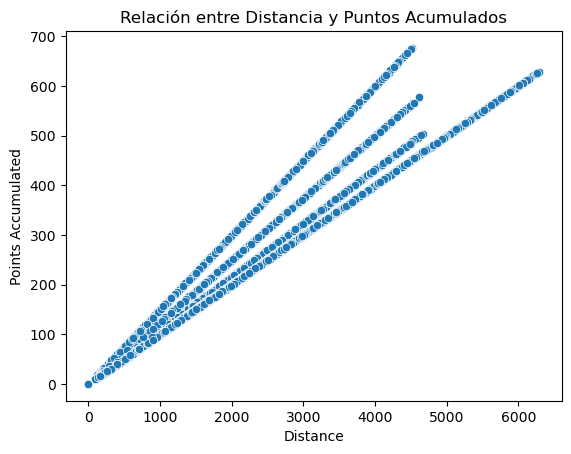

In [10]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
sns.scatterplot(data=df_combined, x='Distance', y='Points Accumulated')
plt.title('Relación entre Distancia y Puntos Acumulados')
plt.show()

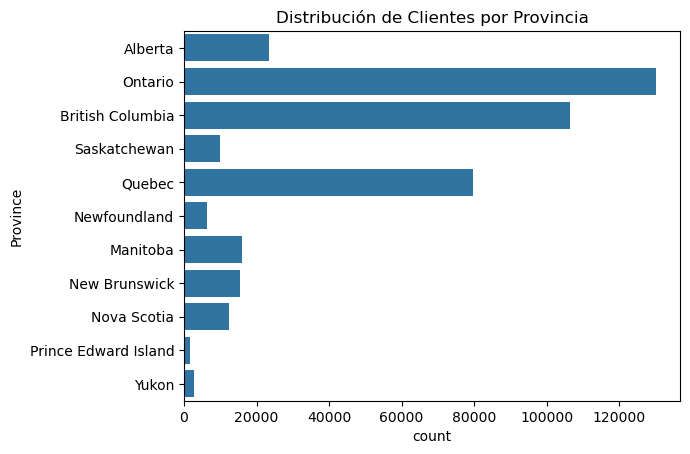

In [11]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?
sns.countplot(data=df_combined, y='Province')
plt.title('Distribución de Clientes por Provincia')
plt.show()

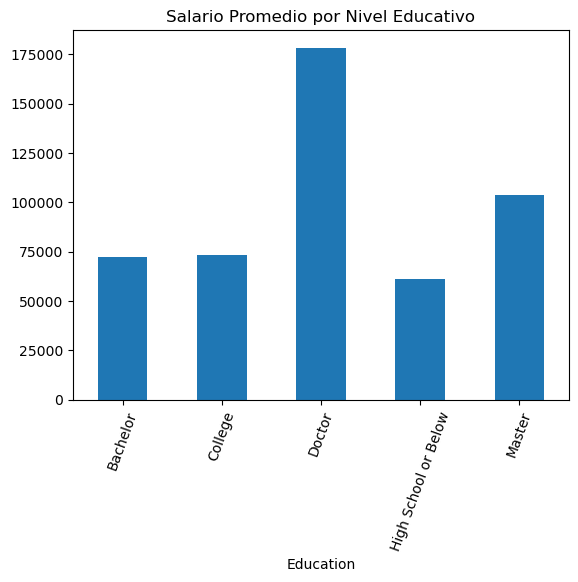

In [12]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
df_combined.groupby('Education')['Salary'].mean().plot(kind='bar')
plt.title('Salario Promedio por Nivel Educativo')
plt.xticks(rotation=70)
plt.show()

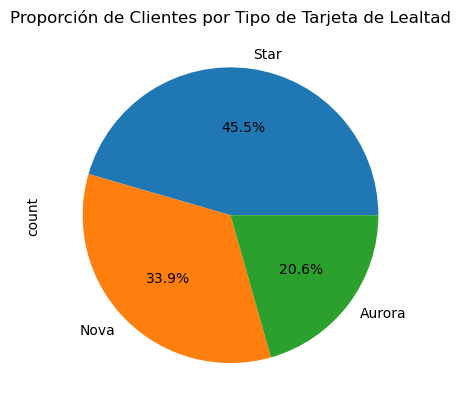

In [13]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
df_combined['Loyalty Card'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Clientes por Tipo de Tarjeta de Lealtad')
plt.show()

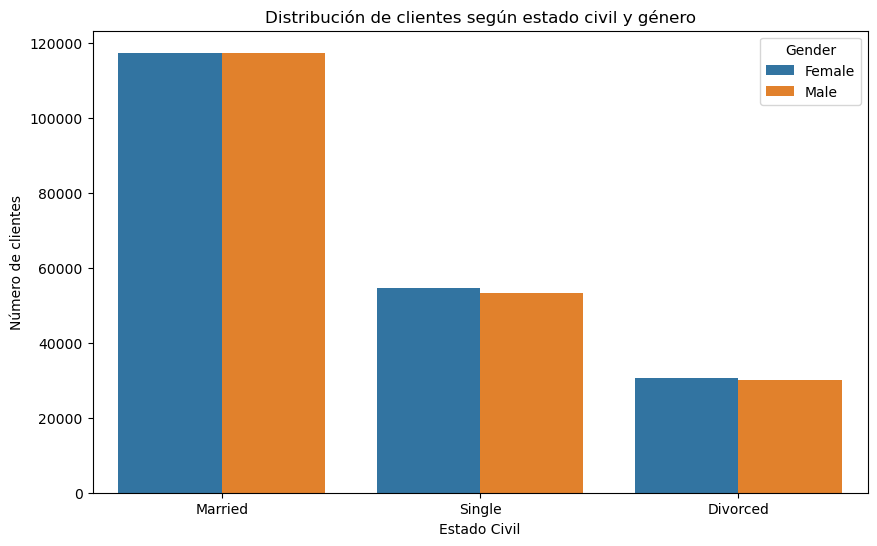

In [14]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='Marital Status', hue='Gender')
plt.title('Distribución de clientes según estado civil y género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de clientes')
plt.show()